# Proyecto módulo 3 : Optimización de Talento

## Fase 1: Análisis Exploratorio de Datos(EDA)

In [115]:
# Librerias necesarias
import pandas as pd
import numpy as np
!pip install word2number
from word2number import w2n
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector
pd.set_option('display.max_columns', None)

Defaulting to user installation because normal site-packages is not writeable


In [116]:
# Leemos el archivo csv y observamos su contenido
df = pd.read_csv("datos_hr_raw_data.csv")
df

,Unnamed: 0,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1673,43,No,NaN,488.944444,NaN,-26,3,Medical,1,824,2,1,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,NaN,NaN,12,"3,0",4,NaN,0,NaN,2,"3,0",3,NaN,1,2,"3949,17$",1980,NaN,NaN,NaN,Yes
1674,1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,4,1,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,Y,No,11,"3,0",3,Full Time,1,"27,0",2,"3,0",5,NaN,1,0,"15943,72$",1976,"191324,62$",NaN,NaN,False
1675,1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,3,0,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,NaN,No,19,"3,0",1,Part Time,0,"6,0",1,"3,0",6,NaN,1,5,NaN,1994,"28111,13$",NaN,NaN,False
1676,1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,3,1,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,NaN,4,"3,0",22,NaN,14,10,"8339,32$",1976,"100071,84$",NaN,NaN,Yes


In [117]:
# analizamos información general para observar donde hay que generar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1678 non-null   int64  
 1   age                       1678 non-null   object 
 2   attrition                 1678 non-null   object 
 3   businesstravel            877 non-null    object 
 4   dailyrate                 1678 non-null   float64
 5   department                312 non-null    object 
 6   distancefromhome          1678 non-null   int64  
 7   education                 1678 non-null   int64  
 8   educationfield            904 non-null    object 
 9   employeecount             1678 non-null   int64  
 10  employeenumber            1678 non-null   int64  
 11  environmentsatisfaction   1678 non-null   int64  
 12  gender                    1678 non-null   int64  
 13  hourlyrate                411 non-null    float64
 14  jobinvol

## Fase 2: Transformación de los datos

### Criterios de eliminación de columnas que no serán útiles en el análisis:
- __Unnamed: 0-->__ actua como indice y ya tenemos uno.
- __employeecount -->__ Un unico valor '1', no nos da información ninguna este dato.
- __numberchildren -->__ 100% nulos.
- __over18 -->__ 55.9% de nulos, los datos que hay equivalen a Y, entendemos que todos los trabajadores tienen +18.
- __hourlyrate -->__ 75% de nulos
- __yearsincurrentrole -->__ 98% de nulos.
- __roledepartament -->__ 81% nulos.
- __sameasmonthlyincome -->__ nos da la misma información de monhtlyincome.
- __educationfield -->__ 46,1% nulos
- __department -->__ 81,4% nulos

In [118]:
# Borramos columnas 

porcentaje_nulos = df.isna().mean() * 100
print(porcentaje_nulos.sort_values(ascending=False))
df = df.drop(columns=['Unnamed: 0', "employeecount", "numberchildren",'over18', 'hourlyrate', 'yearsincurrentrole','roledepartament','sameasmonthlyincome', 'educationfield', 'department'])
df.columns

numberchildren              100.000000
yearsincurrentrole           97.914184
roledepartament              81.406436
department                   81.406436
hourlyrate                   75.506555
over18                       55.899881
businesstravel               47.735399
educationfield               46.126341
overtime                     41.477950
maritalstatus                40.226460
totalworkingyears            32.717521
monthlyincome                29.141836
sameasmonthlyincome          29.141836
standardhours                20.917759
salary                       16.984505
performancerating            11.918951
worklifebalance               6.793802
stockoptionlevel              0.000000
Unnamed: 0                    0.000000
trainingtimeslastyear         0.000000
yearsatcompany                0.000000
yearssincelastpromotion       0.000000
yearswithcurrmanager          0.000000
datebirth                     0.000000
relationshipsatisfaction      0.000000
numcompaniesworked       

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'education', 'employeenumber', 'environmentsatisfaction', 'gender',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'salary', 'remotework'],
      dtype='object')

### Duplicados 

In [119]:
# Verificamos si existen duplicados
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas en el DataFrame.")

Hay 64 filas duplicadas en el DataFrame.


In [120]:
# Eliminamos los duplicados teniendo en cuenta el número de empleado que son valores que no queremos más de una vez.

df = df.drop_duplicates(subset=["employeenumber"], keep="first")
df

,age,attrition,businesstravel,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,No,NaN,2015.722222,6,3,1,1,0,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,1972,"195370,00$",Yes
1,52,No,NaN,2063.388889,1,4,2,3,0,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,1971,"199990,00$",1
2,42,No,travel_rarely,1984.253968,4,2,3,3,0,3,5,ManaGER,4,Married,NaN,"41669,33$",1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,1981,"192320,00$",1
3,47,No,travel_rarely,1771.404762,2,4,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,1976,"171690,00$",False
4,46,No,NaN,1582.771346,3,3,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,1977,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,Yes,travel_rarely,1065.277778,3,1,1610,3,0,2,3,saLEs ExeCUTiVe,4,Married,"8604,17$","22370,83$",1,NaN,11,NaN,1,Full Time,1,NaN,6,"3,0",16,3,7,1987,"103250,00$",0
1610,45,No,non-travel,458.817460,4,2,1611,3,0,3,2,LAboRaTOry tECHNiCIAn,2,NaN,"3705,83$","9635,17$",1,NaN,12,"3,0",2,Part Time,0,NaN,5,"2,0",9,0,8,1978,"44470,00$",1
1611,39,No,travel_rarely,1032.487286,-13,5,1612,13,0,4,3,sAlES ExECUTivE,3,Single,NaN,"21682,23$",0,No,18,"3,0",4,Part Time,0,"9,0",3,"3,0",8,0,7,1984,"100071,84$",Yes
1612,36,No,non-travel,556.256661,8,4,1613,1,0,3,2,SaLes ExecUtIVe,4,Divorced,"4492,84$","11681,39$",4,No,13,NaN,4,Part Time,2,"12,0",3,"3,0",7,0,7,1987,"53914,11$",True


In [121]:
# Verificamos nuevamente 
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas en el DataFrame.")

Hay 0 filas duplicadas en el DataFrame.


### Corregimos texto en columna 'maritalstatus'

In [122]:
# Reemplazamos el valor 'Married' por 'Marreid' para unificar valores.
df['maritalstatus'] = df['maritalstatus'].replace("Marreid", "Married")

In [123]:
#Comprobamos que se ha reemplazado.
df['maritalstatus'].unique()

array([nan, 'Married', 'Divorced', 'Single', 'divorced'], dtype=object)

### Unificamos valores en la columna 'gender'

In [124]:
# Reemplazamos el valor '0' por 'M' y el 1 por 'F' para unificar valores.
def reemplazar_valores(df, gender):
    df[gender] = df[gender].replace({0:"M", 1: "F"})
    return df

In [125]:
# Llamamos a la función
df = reemplazar_valores(df,'gender')

In [126]:
# Comprobamos cambios
df['gender'].unique()

array(['M', 'F'], dtype=object)

### Pasar los datos a minúscula

In [127]:
# Creamos función para cambiar a minúsculas
def convertir_a_minusculas(df, columnas):
    df[columnas] = df[columnas].apply(lambda x: x.str.lower())
    return df

In [128]:
# Usamos la función para las siguientes columnas
columnas_a_convertir = ["attrition", "businesstravel", "jobrole", "maritalstatus", 
                        "overtime", "standardhours", "remotework"]

df = convertir_a_minusculas(df, columnas_a_convertir)

In [129]:
# Comprobamos los cambios
df.head(10)

,age,attrition,businesstravel,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,NaN,2015.722222,6,3,1,1,M,3,5,research director,3,NaN,"16280,83$","42330,17$",7,no,13,"3,0",3,full time,0,NaN,5,"3,0",20,15,15,1972,"195370,00$",yes
1,52,no,NaN,2063.388889,1,4,2,3,M,2,5,manager,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,1971,"199990,00$",1
2,42,no,travel_rarely,1984.253968,4,2,3,3,M,3,5,manager,4,married,NaN,"41669,33$",1,no,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,1981,"192320,00$",1
3,47,no,travel_rarely,1771.404762,2,4,4,1,F,3,4,research director,3,married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,full time,2,NaN,2,NaN,20,5,6,1976,"171690,00$",false
4,46,no,NaN,1582.771346,3,3,5,1,F,4,4,sales executive,1,divorced,"12783,92$","33238,20$",2,no,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,1977,NaN,0
5,48,no,NaN,1771.920635,22,3,6,4,F,3,4,manager,4,NaN,"14311,67$","37210,33$",3,no,11,"3,0",2,NaN,1,NaN,3,"3,0",22,4,7,1975,NaN,yes
6,59,no,NaN,1032.487286,25,3,7,1,F,3,3,sales executive,1,NaN,"8339,32$","21682,23$",7,NaN,11,"3,0",4,part time,0,"28,0",3,"2,0",21,7,9,1964,"100071,84$",true
7,42,no,travel_rarely,556.256661,1,1,8,2,M,3,2,sales executive,3,married,NaN,"11681,39$",1,no,25,"4,0",3,part time,0,"20,0",3,"3,0",20,11,6,1981,"53914,11$",0
8,41,no,NaN,1712.182540,2,5,9,2,F,3,4,manager,1,married,"13829,17$","35955,83$",7,no,16,"3,0",2,full time,1,"22,0",2,"3,0",18,11,8,1982,"165950,00$",true
9,41,no,travel_frequently,1973.984127,9,3,10,1,M,3,5,research director,3,NaN,"15943,72$","41453,67$",2,no,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,0,11,1982,NaN,0


### Corregir datos de la columna 'age'

In [130]:
df['age'].unique()

array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', 'forty-seven', '53',
       '43', '60', '32', '37', '49', '39', '50', '44', '30',
       'fifty-eight', '29', '31', '54', '57', '27', 'thirty-six', '28',
       '26', 'fifty-five', '25', 'fifty-two', 'thirty-one', '24',
       'thirty', '23', '22', '21', '20', 'twenty-six', '19',
       'thirty-seven', '18', 'thirty-two', 'twenty-four'], dtype=object)

In [131]:
# Aplicar conversión de texto a número en la columna 'age' ya que existen valores como cadena de texto.
df["age"] = df["age"].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)

In [132]:
# Comprobamos cambios 
df['age'].unique()

array([51, 52, 42, 47, 46, 48, 59, 41, 56, 38, 55, 40, 58, 35, 45, 33, 36,
       34, 53, 43, 60, 32, 37, 49, 39, 50, 44, 30, 29, 31, 54, 57, 27, 28,
       26, 25, 24, 23, 22, 21, 20, 19, 18], dtype=int64)

### Cambiar a INT las columnas 'performancerating', 'totalworkingyears', 'worklifebalance'

In [133]:
# Revisamos sus valores únicos
df['performancerating'].unique()

array(['3,0', '4,0', nan], dtype=object)

In [134]:
df['totalworkingyears'].unique()

array([nan, '34,0', '22,0', '28,0', '20,0', '21,0', '33,0', '40,0',
       '18,0', '25,0', '15,0', '17,0', '26,0', '16,0', '24,0', '14,0',
       '23,0', '27,0', '19,0', '11,0', '38,0', '37,0', '13,0', '12,0',
       '29,0', '10,0', '36,0', '35,0', '9,0', '31,0', '32,0', '8,0',
       '7,0', '30,0', '6,0', '5,0', '4,0', '3,0', '2,0', '1,0', '0,0'],
      dtype=object)

In [135]:
df['worklifebalance'].unique()

array(['3,0', nan, '2,0', '4,0', '1,0'], dtype=object)

In [136]:
# Creamos una funcion para cambiar las comas por puntos y luego convertir columnas tipo object a INT
def convertir_a_int(df, columnas):
    df[columnas] = (df[columnas]
                    .astype(str)                         # Asegura que los valores sean cadenas
                    .apply(lambda x: x.str.replace(',', '.'))  # Reemplaza comas por puntos
                    .apply(pd.to_numeric, errors='coerce')    # Convierte a numérico
                    .astype('Int64'))                         # Convierte a int, manteniendo NaN
    return df



In [137]:
# Usamos la función
columnas_a_convertir = ['performancerating', 'totalworkingyears', 'worklifebalance']
df = convertir_a_int(df, columnas_a_convertir)

In [138]:
# Comprobamos cambios
df

,age,attrition,businesstravel,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,NaN,2015.722222,6,3,1,1,M,3,5,research director,3,NaN,"16280,83$","42330,17$",7,no,13,3,3,full time,0,<NA>,5,3,20,15,15,1972,"195370,00$",yes
1,52,no,NaN,2063.388889,1,4,2,3,M,2,5,manager,3,NaN,NaN,"43331,17$",0,NaN,14,3,1,NaN,1,34,5,3,33,11,9,1971,"199990,00$",1
2,42,no,travel_rarely,1984.253968,4,2,3,3,M,3,5,manager,4,married,NaN,"41669,33$",1,no,11,3,4,NaN,0,22,3,<NA>,22,11,15,1981,"192320,00$",1
3,47,no,travel_rarely,1771.404762,2,4,4,1,F,3,4,research director,3,married,"14307,50$","37199,50$",3,NaN,19,3,2,full time,2,<NA>,2,<NA>,20,5,6,1976,"171690,00$",false
4,46,no,NaN,1582.771346,3,3,5,1,F,4,4,sales executive,1,divorced,"12783,92$","33238,20$",2,no,12,3,4,NaN,1,<NA>,5,3,19,2,8,1977,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,1065.277778,3,1,1610,3,M,2,3,sales executive,4,married,"8604,17$","22370,83$",1,NaN,11,<NA>,1,full time,1,<NA>,6,3,16,3,7,1987,"103250,00$",0
1610,45,no,non-travel,458.817460,4,2,1611,3,M,3,2,laboratory technician,2,NaN,"3705,83$","9635,17$",1,NaN,12,3,2,part time,0,<NA>,5,2,9,0,8,1978,"44470,00$",1
1611,39,no,travel_rarely,1032.487286,-13,5,1612,13,M,4,3,sales executive,3,single,NaN,"21682,23$",0,no,18,3,4,part time,0,9,3,3,8,0,7,1984,"100071,84$",yes
1612,36,no,non-travel,556.256661,8,4,1613,1,M,3,2,sales executive,4,divorced,"4492,84$","11681,39$",4,no,13,<NA>,4,part time,2,12,3,3,7,0,7,1987,"53914,11$",true


### Eliminar símbolo de dolar 

In [139]:
# Eliminar símbolo de dólar si aparece
def eliminar_dolar(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.replace('$', '', regex=False)
    return df

In [140]:
# Llamamos a la función
df = eliminar_dolar(df)

In [141]:
# Verificamos cambios
df

,age,attrition,businesstravel,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,NaN,2015.722222,6,3,1,1,M,3,5,research director,3,NaN,"16280,83","42330,17",7,no,13,3,3,full time,0,<NA>,5,3,20,15,15,1972,"195370,00",yes
1,52,no,NaN,2063.388889,1,4,2,3,M,2,5,manager,3,NaN,NaN,"43331,17",0,NaN,14,3,1,NaN,1,34,5,3,33,11,9,1971,"199990,00",1
2,42,no,travel_rarely,1984.253968,4,2,3,3,M,3,5,manager,4,married,NaN,"41669,33",1,no,11,3,4,NaN,0,22,3,<NA>,22,11,15,1981,"192320,00",1
3,47,no,travel_rarely,1771.404762,2,4,4,1,F,3,4,research director,3,married,"14307,50","37199,50",3,NaN,19,3,2,full time,2,<NA>,2,<NA>,20,5,6,1976,"171690,00",false
4,46,no,NaN,1582.771346,3,3,5,1,F,4,4,sales executive,1,divorced,"12783,92","33238,20",2,no,12,3,4,NaN,1,<NA>,5,3,19,2,8,1977,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,1065.277778,3,1,1610,3,M,2,3,sales executive,4,married,"8604,17","22370,83",1,NaN,11,<NA>,1,full time,1,<NA>,6,3,16,3,7,1987,"103250,00",0
1610,45,no,non-travel,458.817460,4,2,1611,3,M,3,2,laboratory technician,2,NaN,"3705,83","9635,17",1,NaN,12,3,2,part time,0,<NA>,5,2,9,0,8,1978,"44470,00",1
1611,39,no,travel_rarely,1032.487286,-13,5,1612,13,M,4,3,sales executive,3,single,NaN,"21682,23",0,no,18,3,4,part time,0,9,3,3,8,0,7,1984,"100071,84",yes
1612,36,no,non-travel,556.256661,8,4,1613,1,M,3,2,sales executive,4,divorced,"4492,84","11681,39",4,no,13,<NA>,4,part time,2,12,3,3,7,0,7,1987,"53914,11",true


### Eliminamos espacios

In [142]:
# Eliminar espacios en columnas tipo texto
def eliminar_espacios(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()
    return df

In [143]:
# Llamamos a la función
df = eliminar_espacios(df)

### Redondear a dos decimales

In [144]:
# Redondear floats a 2 decimales
def redondear_floats(df):
    float_cols = df.select_dtypes(include='float')
    df[float_cols.columns] = float_cols.round(2)
    return df

In [145]:
# Llamamos a la función
df = redondear_floats(df)

### Convertir datos de 'remotework' a yes/no

In [146]:
df['remotework'].unique()

array(['yes', '1', 'false', '0', 'true'], dtype=object)

In [147]:
df['remotework'] = df['remotework'].astype(str).replace({'1': 'yes', 'true': 'yes', 'false': 'no', '0': 'no'})

In [148]:
# Verificar cambio
df['remotework'].unique()

array(['yes', 'no'], dtype=object)

### Transformar valores negativos en 'distancefromhome'

In [149]:
df['distancefromhome'].unique()

array([  6,   1,   4,   2,   3,  22,  25,   9,   7,  23,  10,  12,  14,
       -13,  15,   8, -42,  28, -37,   5,  16, -35,  26, -26,  24,  29,
       -25,  17,  21, -18, -10, -30, -27,  20, -31, -29, -39,  18, -21,
       -15,  11,  13, -14,  19, -33, -34, -46, -36, -19,  27, -12, -23,
       -45, -28, -47, -32, -24, -16, -22, -41, -49, -11, -48, -38, -20,
       -17, -43, -40, -44], dtype=int64)

In [150]:
# Transformamos cualquier número negativo en positivo sin alterar los valores absolutos.
df['distancefromhome'] = df['distancefromhome'].abs() 

In [151]:
# Verificamos cambio
df['distancefromhome'].unique()

array([ 6,  1,  4,  2,  3, 22, 25,  9,  7, 23, 10, 12, 14, 13, 15,  8, 42,
       28, 37,  5, 16, 35, 26, 24, 29, 17, 21, 18, 30, 27, 20, 31, 39, 11,
       19, 33, 34, 46, 36, 45, 47, 32, 41, 49, 48, 38, 43, 40, 44],
      dtype=int64)

### Cambiar a float 'Salary', 'monthlyincome' y 'monthlyrate'

In [152]:
print(df['salary'].dtype)
print(df['monthlyincome'].dtype)
print(df['monthlyrate'].dtype)

object
object
object


In [153]:
# Creamos una función para cambiar comas por puntos y convertir columna a float
def convertir_columnas_a_float(df, columnas):
    df[columnas] = (df[columnas]
                    .astype(str)                # Asegura que los valores sean texto
                    .apply(lambda x: x.str.replace(',', '.'))  # Reemplaza comas por puntos
                    .apply(lambda x: x.str.strip())  # Elimina espacios en blanco
                    .apply(pd.to_numeric, errors='coerce'))  # Convierte a float, asignando NaN si hay errores
    
    return df


In [154]:
# Usamos la función con varias columnas
columnas_a_convertir = ['salary', 'monthlyincome', 'monthlyrate']
df = convertir_columnas_a_float(df, columnas_a_convertir)

In [155]:
print(df['salary'].dtype)
print(df['monthlyincome'].dtype)
print(df['monthlyrate'].dtype)

float64
float64
float64


In [156]:
df

,age,attrition,businesstravel,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,NaN,2015.72,6,3,1,1,M,3,5,research director,3,NaN,16280.83,42330.17,7,no,13,3,3,full time,0,<NA>,5,3,20,15,15,1972,195370.00,yes
1,52,no,NaN,2063.39,1,4,2,3,M,2,5,manager,3,NaN,NaN,43331.17,0,NaN,14,3,1,NaN,1,34,5,3,33,11,9,1971,199990.00,yes
2,42,no,travel_rarely,1984.25,4,2,3,3,M,3,5,manager,4,married,NaN,41669.33,1,no,11,3,4,NaN,0,22,3,<NA>,22,11,15,1981,192320.00,yes
3,47,no,travel_rarely,1771.40,2,4,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,NaN,19,3,2,full time,2,<NA>,2,<NA>,20,5,6,1976,171690.00,no
4,46,no,NaN,1582.77,3,3,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3,4,NaN,1,<NA>,5,3,19,2,8,1977,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,1065.28,3,1,1610,3,M,2,3,sales executive,4,married,8604.17,22370.83,1,NaN,11,<NA>,1,full time,1,<NA>,6,3,16,3,7,1987,103250.00,no
1610,45,no,non-travel,458.82,4,2,1611,3,M,3,2,laboratory technician,2,NaN,3705.83,9635.17,1,NaN,12,3,2,part time,0,<NA>,5,2,9,0,8,1978,44470.00,yes
1611,39,no,travel_rarely,1032.49,13,5,1612,13,M,4,3,sales executive,3,single,NaN,21682.23,0,no,18,3,4,part time,0,9,3,3,8,0,7,1984,100071.84,yes
1612,36,no,non-travel,556.26,8,4,1613,1,M,3,2,sales executive,4,divorced,4492.84,11681.39,4,no,13,<NA>,4,part time,2,12,3,3,7,0,7,1987,53914.11,yes


### Nulos

In [157]:
# Verificamos nulos
print(df.isna().sum())

age                           0
attrition                     0
businesstravel              772
dailyrate                     0
distancefromhome              0
education                     0
employeenumber                0
environmentsatisfaction       0
gender                        0
jobinvolvement                0
joblevel                      0
jobrole                       0
jobsatisfaction               0
maritalstatus               651
monthlyincome               468
monthlyrate                   0
numcompaniesworked            0
overtime                    676
percentsalaryhike             0
performancerating           195
relationshipsatisfaction      0
standardhours               338
stockoptionlevel              0
totalworkingyears           526
trainingtimeslastyear         0
worklifebalance             108
yearsatcompany                0
yearssincelastpromotion       0
yearswithcurrmanager          0
datebirth                     0
salary                      274
remotewo

##### Imputación de nulos en 'Salary'

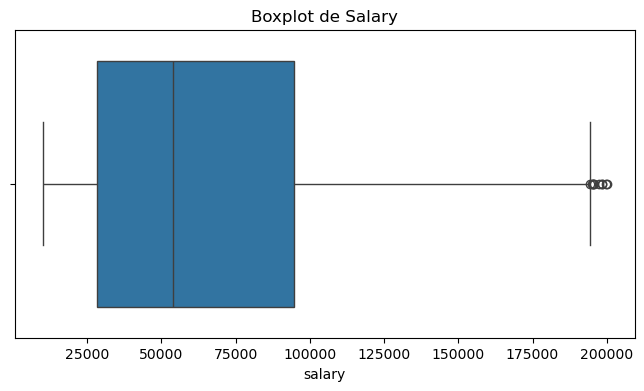

In [158]:
# Analizamos con visualización la variable 'Salary' para observar outliers.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['salary'])
plt.title('Boxplot de Salary')
plt.show()

In [159]:
print("Cantidad de valores nulos en 'salary':", df['salary'].isna().sum())

Cantidad de valores nulos en 'salary': 274


In [160]:
# Calcular la mediana de 'salary' ignorando nulos
mediana_salary = df['salary'].median()

# Rellenar los valores nulos con la mediana
df['salary'] = df['salary'].fillna(mediana_salary)


In [161]:
df['salary'].describe()

count      1614.00000
mean      63322.14316
std       42066.07078
min       10090.00000
25%       29040.00000
50%       53914.11000
75%       64585.00000
max      199990.00000
Name: salary, dtype: float64

##### Imputación de nulos en 'Overtime'

In [162]:
# Decidimos reemplazar los nulos por 'desconocido'
df['overtime'] = df['overtime'].fillna('desconocido')

In [163]:
df['overtime']

0                no
1       desconocido
2                no
3       desconocido
4                no
           ...     
1609    desconocido
1610    desconocido
1611             no
1612             no
1613    desconocido
Name: overtime, Length: 1614, dtype: object

##### Imputación de nulos en 'Monthlyincome'

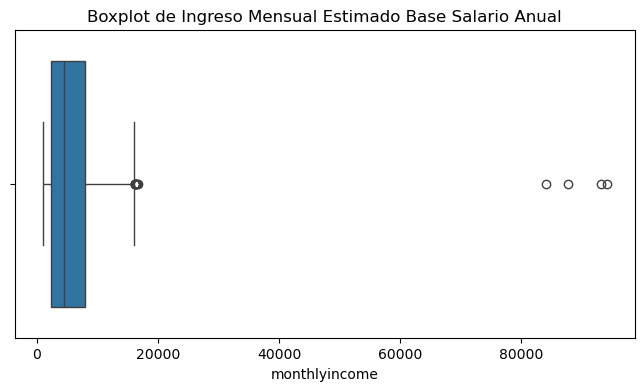

In [164]:
# Analizamos con visualización la variable 'monthlyincome' para observar outliers.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['monthlyincome'])
plt.title('Boxplot de Ingreso Mensual Estimado Base Salario Anual')
plt.show()

In [165]:
# Calcular la mediana de 'monthlyincome' ignorando nulos
mediana_monthly_income = df['monthlyincome'].median()

# Rellenar los valores nulos con la mediana
df['monthlyincome'] = df['monthlyincome'].fillna(mediana_monthly_income)

In [166]:
df["monthlyincome"].isnull().sum()

0

In [167]:
df

,age,attrition,businesstravel,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,NaN,2015.72,6,3,1,1,M,3,5,research director,3,NaN,16280.83,42330.17,7,no,13,3,3,full time,0,<NA>,5,3,20,15,15,1972,195370.00,yes
1,52,no,NaN,2063.39,1,4,2,3,M,2,5,manager,3,NaN,4492.84,43331.17,0,desconocido,14,3,1,NaN,1,34,5,3,33,11,9,1971,199990.00,yes
2,42,no,travel_rarely,1984.25,4,2,3,3,M,3,5,manager,4,married,4492.84,41669.33,1,no,11,3,4,NaN,0,22,3,<NA>,22,11,15,1981,192320.00,yes
3,47,no,travel_rarely,1771.40,2,4,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,desconocido,19,3,2,full time,2,<NA>,2,<NA>,20,5,6,1976,171690.00,no
4,46,no,NaN,1582.77,3,3,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3,4,NaN,1,<NA>,5,3,19,2,8,1977,53914.11,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,1065.28,3,1,1610,3,M,2,3,sales executive,4,married,8604.17,22370.83,1,desconocido,11,<NA>,1,full time,1,<NA>,6,3,16,3,7,1987,103250.00,no
1610,45,no,non-travel,458.82,4,2,1611,3,M,3,2,laboratory technician,2,NaN,3705.83,9635.17,1,desconocido,12,3,2,part time,0,<NA>,5,2,9,0,8,1978,44470.00,yes
1611,39,no,travel_rarely,1032.49,13,5,1612,13,M,4,3,sales executive,3,single,4492.84,21682.23,0,no,18,3,4,part time,0,9,3,3,8,0,7,1984,100071.84,yes
1612,36,no,non-travel,556.26,8,4,1613,1,M,3,2,sales executive,4,divorced,4492.84,11681.39,4,no,13,<NA>,4,part time,2,12,3,3,7,0,7,1987,53914.11,yes


#### Guardamos el dataframe limpio como archivo csv

In [168]:
df.to_csv("abc_corporation_hr_clean.csv", index=False)

print("Archivo guardado correctamente como 'abc_corporation_hr_clean.csv'")

Archivo guardado correctamente como 'abc_corporation_hr_clean.csv'


## Fase 3: Visualizando los datos.

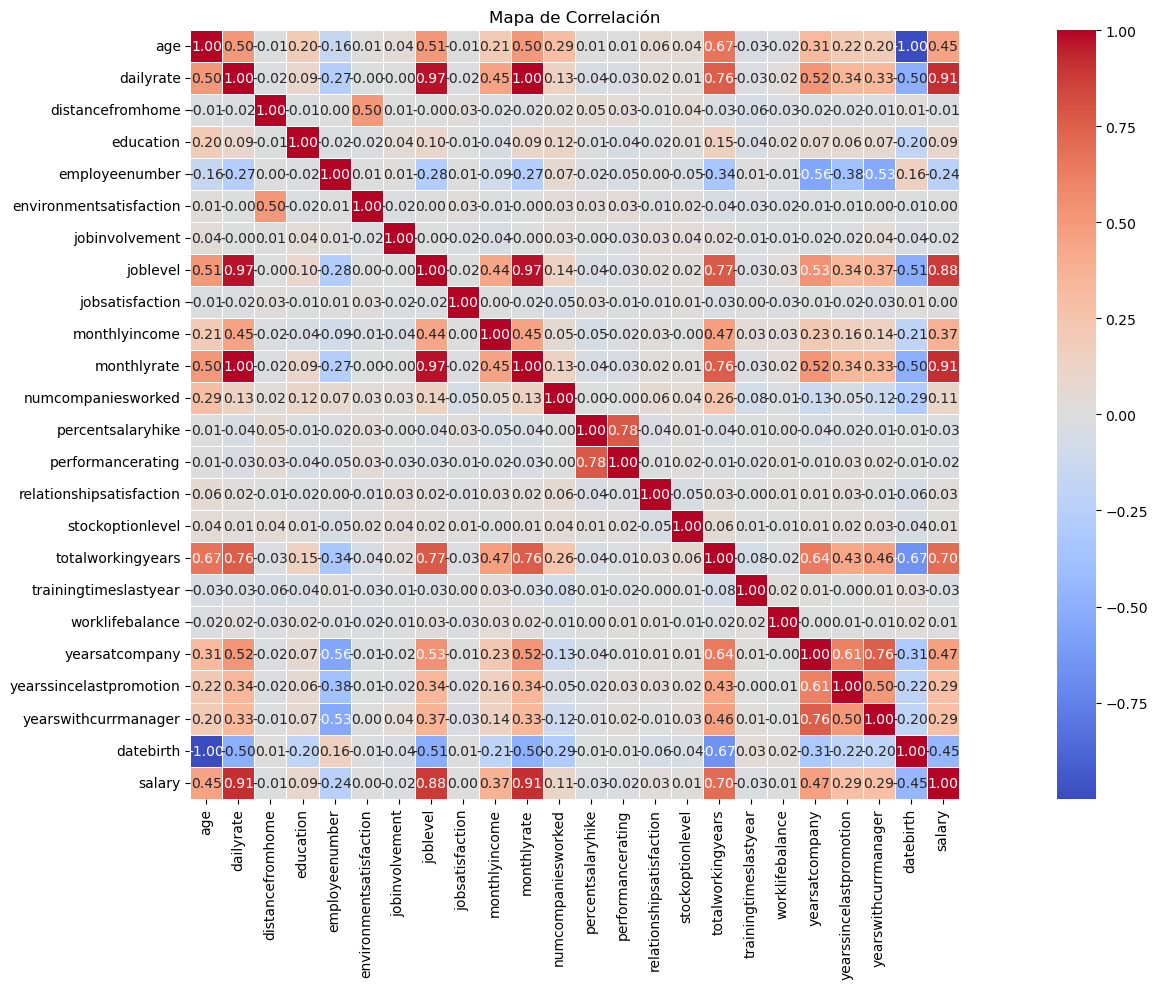

In [169]:
# Selecciona solo columnas numéricas
df_numerico = df.select_dtypes(include=["number"])
# Calcula la matriz de correlación
correlaciones = df_numerico.corr()
# Mapa de calor
plt.figure(figsize=(20, 10))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Mapa de Correlación")
plt.tight_layout()
plt.show()

##### Conclusión: si bien existen correlaciones fuertes, no son variables en las que hemos decidido focalizar nuestro análisis.

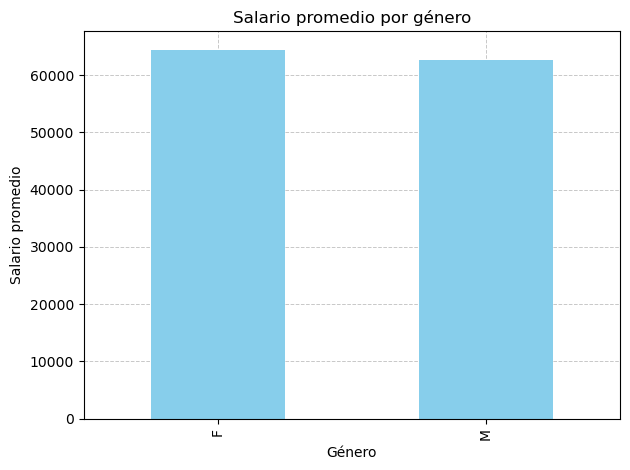

In [170]:
# Analizamos distribución de salario por género
gender_salary = df.groupby('gender')['salary'].mean()

ax = gender_salary.plot(kind='bar', color='skyblue')

# Activar la cuadrícula con líneas en ambos ejes
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Opcional: mejorar la visibilidad de las líneas del eje X
ax.set_axisbelow(True)

plt.title('Salario promedio por género')
plt.xlabel('Género')
plt.ylabel('Salario promedio')
plt.tight_layout()
plt.show()

##### Conclusión: Si bien existe una diferencia es muy pequeña

C:\Users\carol\AppData\Local\Temp\ipykernel_31568\3331753602.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='joblevel', y='jobinvolvement', ci=None, palette='pastel')
C:\Users\carol\AppData\Local\Temp\ipykernel_31568\3331753602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='joblevel', y='jobinvolvement', ci=None, palette='pastel')


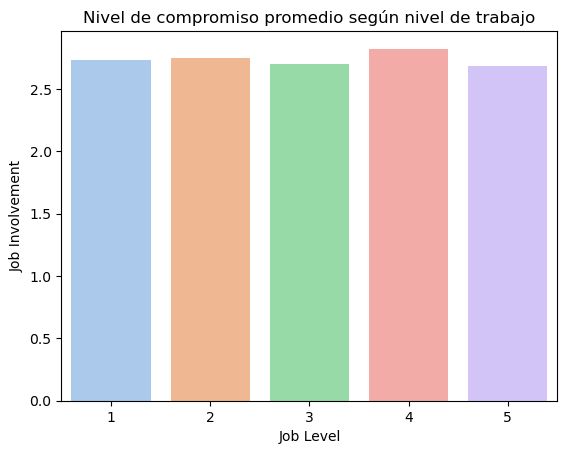

In [171]:
# Analizamos nivel de compromiso y nivel de trabajo
sns.barplot(data=df, x='joblevel', y='jobinvolvement', ci=None, palette='pastel')
plt.title('Nivel de compromiso promedio según nivel de trabajo')
plt.xlabel('Job Level')
plt.ylabel('Job Involvement')
plt.show()


##### Conclusión: parece que el nivel de compromiso no varía en relación al puesto ocupado, en general el nivel de compromiso es medio-bajo.

In [172]:
# Calculamos porcentaje de empleados que ya no trabajan en la empresa
porcentaje_salidas = (df['attrition'].value_counts(normalize=True) * 100).round(2).reset_index
print(porcentaje_salidas)


<bound method Series.reset_index of attrition
no     83.95
yes    16.05
Name: proportion, dtype: float64>


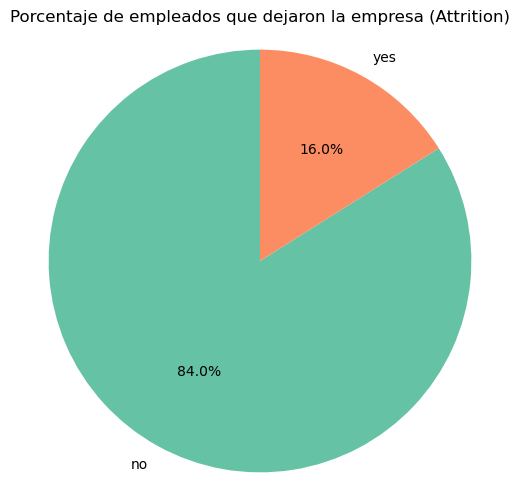

In [173]:
# Contamos los valores de la variable 'attrition'
conteo = df['attrition'].value_counts()
porcentajes = conteo / conteo.sum() * 100
# Creamos el pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    porcentajes,
    labels=porcentajes.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66C2A5', '#FC8D62']
)
plt.title("Porcentaje de empleados que dejaron la empresa (Attrition)")
plt.axis('equal')  
plt.show()

##### Conclusión: el % de empleados que dejaron de trabajar en la empresa es relativamente bajo en comparación al de los que continuan.

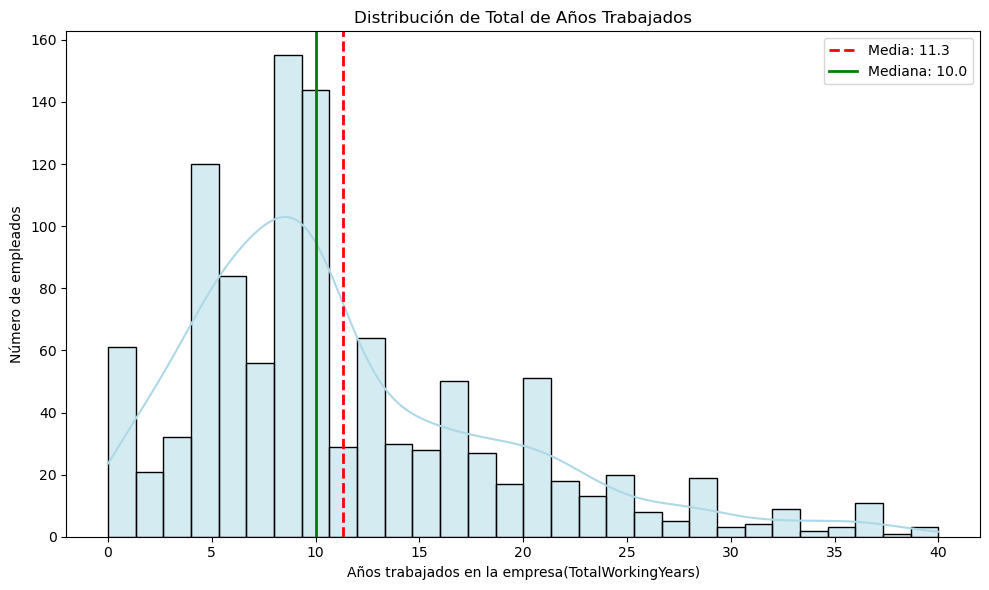

In [174]:
# Distribución del total de años trabajados en al empresa
media = df["totalworkingyears"].mean()
mediana = df["totalworkingyears"].median()
plt.figure(figsize=(10, 6))
sns.histplot(df["totalworkingyears"], bins=30, kde=True, color="lightblue")
# Línea de la media
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Media: {media:.1f}")
# Línea de la mediana
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f"Mediana: {mediana:.1f}")
plt.title("Distribución de Total de Años Trabajados")
plt.xlabel("Años trabajados en la empresa(TotalWorkingYears)")
plt.ylabel("Número de empleados")
plt.legend()
plt.tight_layout()
plt.show()


##### Conclusión: La mayoría de los empleados han trabajado entre 5 y 15 años, con una concentración particularmente alta alrededor de los 10 años.Esto puede ser señal de una plantilla estable. 


C:\Users\carol\AppData\Local\Temp\ipykernel_31568\3387271273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["attrition"], y=df["numcompaniesworked"], palette="pastel")


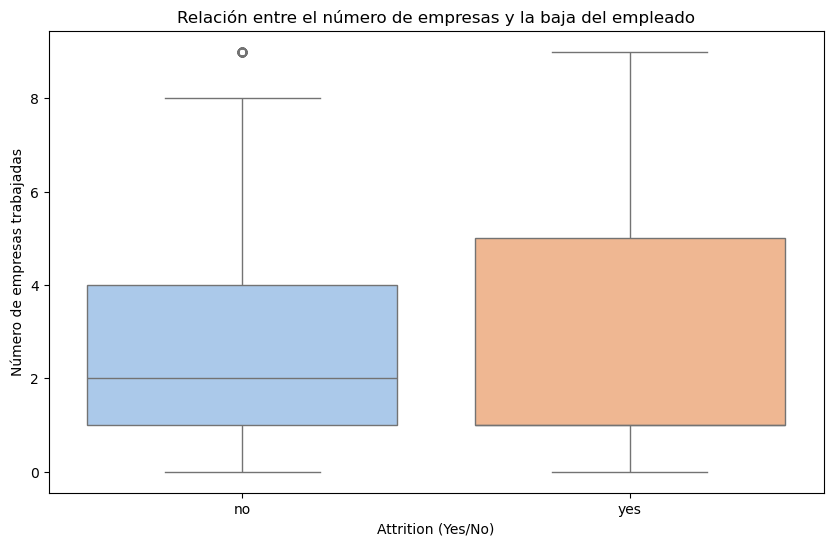

In [175]:
# Analizamos si los empleados que han trabajado en más empresas tienen mayor probabilidad de dejar la compañía.
plt.figure(figsize=(10,6))
sns.boxplot(x=df["attrition"], y=df["numcompaniesworked"], palette="pastel")

plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Número de empresas trabajadas")
plt.title("Relación entre el número de empresas y la baja del empleado")
plt.show()

##### Conclusión: Los empleados que han dejado la empresa tienden a haber trabajado en más empresas en comparación con aquellos que siguen en la compañía. Este patrón puede implicar que empleados con historial de trabajo en varias empresas tienen mayor tendencia a rotar y abandonar compañías con más frecuencia. 



In [176]:
df_yes = df[df["attrition"] == "yes"]  # Filtramos los registros con "Yes"
df_no = df[df["attrition"] == "no"]    # Filtramos los registros con "No"

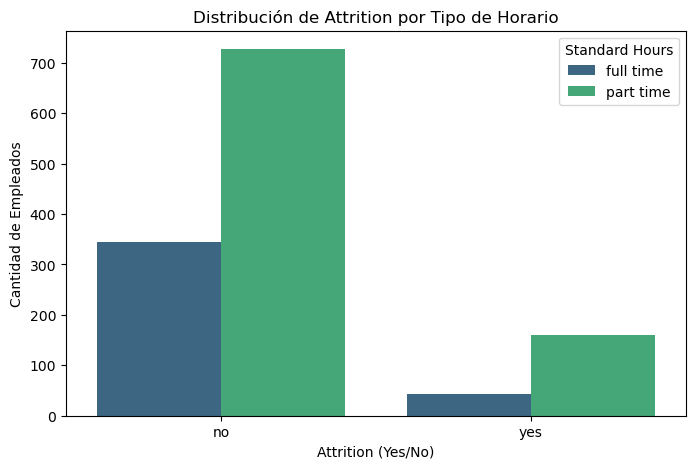

In [177]:
# Analizamos los tipos de jornada laboral de los empleados que siguen en la empresa y los que no.
attrition_counts = df.groupby(['attrition', 'standardhours']).size().reset_index(name='Count')

# Configurar el gráfico
plt.figure(figsize=(8,5))
sns.barplot(x='attrition', y='Count', hue='standardhours', data=attrition_counts, palette='viridis')

# Etiquetas y título
plt.xlabel('Attrition (Yes/No)')
plt.ylabel('Cantidad de Empleados')
plt.title('Distribución de Attrition por Tipo de Horario')
plt.legend(title='Standard Hours')

# Mostrar gráfico
plt.show()


In [178]:
# Total de empleados por tipo de jornada
total_por_jornada = df.groupby('standardhours').size()

# Empleados que se fueron por tipo de jornada
attrition_yes = df[df['attrition'] == 'yes'].groupby('standardhours').size()

# Calcular la tasa de attrition por tipo de jornada
tasa_attrition = (attrition_yes / total_por_jornada * 100).round(2)

# Mostrar resultado
print("Tasa de attrition por tipo de jornada (%):")
print(tasa_attrition)

Tasa de attrition por tipo de jornada (%):
standardhours
full time    11.34
part time    18.13
dtype: float64


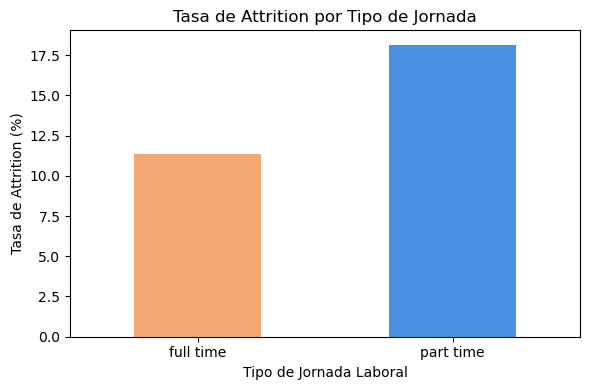

In [179]:
# Total de empleados por tipo de jornada
total_por_jornada = df.groupby('standardhours').size()

# Empleados que se fueron por tipo de jornada
attrition_yes = df[df['attrition'] == 'yes'].groupby('standardhours').size()

# Calcular la tasa de attrition (%)
tasa_attrition = (attrition_yes / total_por_jornada * 100).round(2)

# Crear gráfico
plt.figure(figsize=(6,4))
tasa_attrition.plot(kind='bar', color=['#F5A873', '#4A90E2'])  

# Añadir etiquetas y título
plt.ylabel('Tasa de Attrition (%)')
plt.xlabel('Tipo de Jornada Laboral')
plt.title('Tasa de Attrition por Tipo de Jornada')
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()

##### Conclusión: la mayoría de empleados que dejaron la empresa eran part-time, esto se debe a que también hay muchos part-time en general, los empleados a tiempo parcial abandonan la empresa con más frecuencia


In [180]:
df_yes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,259.0,33.803089,9.783897,18.0,27.5,32.0,39.5,58.0
dailyrate,259.0,503.63749,365.812141,104.1,290.04,290.04,556.26,2047.5
distancefromhome,259.0,11.837838,9.897378,1.0,3.0,9.0,18.0,45.0
education,259.0,2.853282,1.012374,1.0,2.0,3.0,4.0,5.0
employeenumber,259.0,960.436293,431.408814,14.0,620.0,1030.0,1338.0,1610.0
environmentsatisfaction,259.0,3.397683,5.049383,1.0,1.0,3.0,4.0,42.0
jobinvolvement,259.0,2.513514,0.779343,1.0,2.0,3.0,3.0,4.0
joblevel,259.0,1.644788,0.926192,1.0,1.0,1.0,2.0,5.0
jobsatisfaction,259.0,2.486486,1.121846,1.0,1.0,3.0,3.0,4.0
monthlyincome,259.0,4856.71861,7770.606598,1183.33,2342.59,4492.84,4492.84,93167.0


In [181]:
df_no.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1355.0,37.516605,8.84548,18.0,31.0,36.0,43.0,60.0
dailyrate,1355.0,701.361018,483.754986,108.54,290.04,556.26,1032.49,2063.39
distancefromhome,1355.0,11.008856,10.551271,1.0,2.0,8.0,16.0,49.0
education,1355.0,2.938745,1.024052,1.0,2.0,3.0,4.0,5.0
employeenumber,1355.0,778.267159,466.878377,1.0,372.5,760.0,1169.5,1614.0
environmentsatisfaction,1355.0,4.466421,7.295474,1.0,2.0,3.0,4.0,49.0
jobinvolvement,1355.0,2.783026,0.68977,1.0,2.0,3.0,3.0,4.0
joblevel,1355.0,2.149077,1.11386,1.0,1.0,2.0,3.0,5.0
jobsatisfaction,1355.0,2.786716,1.096982,1.0,2.0,3.0,4.0,4.0
monthlyincome,1355.0,5442.220561,4654.6072,1000.0,3605.835,4492.84,4753.33,94083.0


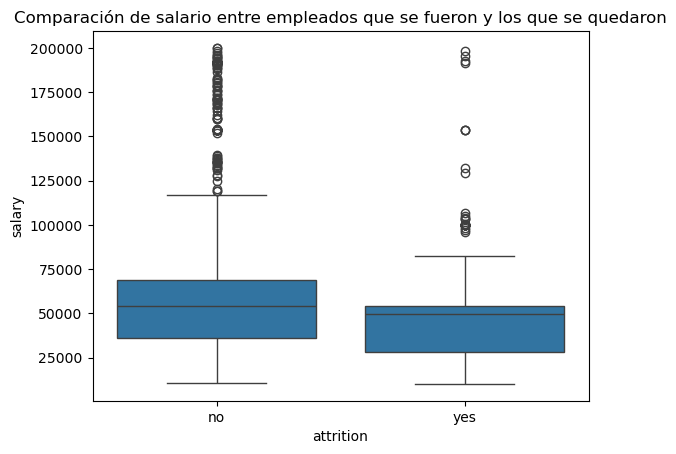

In [182]:
# Analizamos visualmente el salario de los que trabajan en la empresa y los que ya no lo hacen.
sns.boxplot(data=df, x='attrition', y='salary')
plt.title('Comparación de salario entre empleados que se fueron y los que se quedaron')
plt.show()

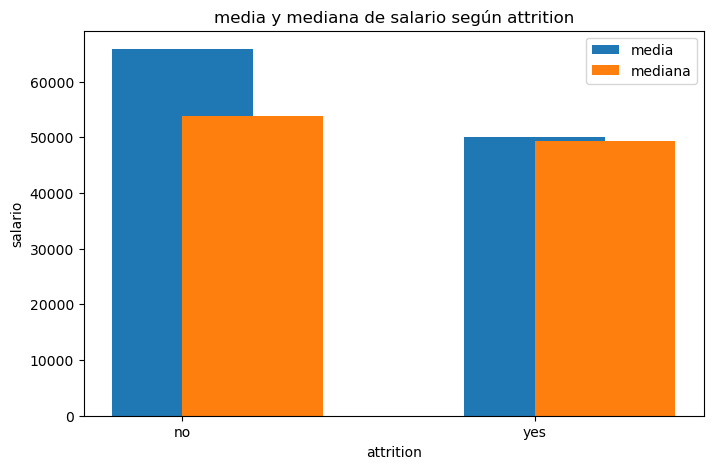

In [183]:
# Calculamos media y mediana del salario por attrition
stats = df.groupby('attrition')['salary'].agg(['mean', 'median']).reset_index()
# configurar gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))
# barras de media
ax.bar(stats['attrition'], stats['mean'], width=0.4, label='media', align='center')
# barras de mediana, las movemos un poco para que no se solapen
ax.bar(stats['attrition'], stats['median'], width=0.4, label='mediana', align='edge')
# etiquetas y título
ax.set_xlabel('attrition')
ax.set_ylabel('salario')
ax.set_title('media y mediana de salario según attrition')
ax.legend()
plt.show()

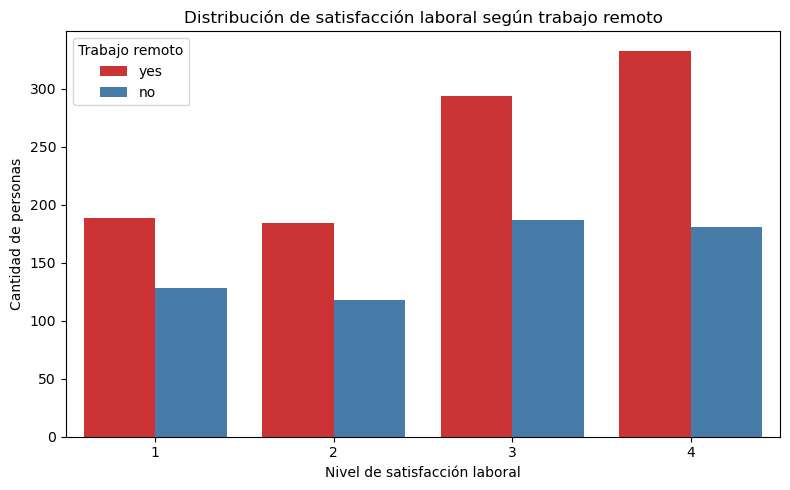

In [184]:
# Graficamos la relación de trabajo remoto con satisfacción laboral.
# Aseguramos que jobsatisfaction es categórica ordenada
df['jobsatisfaction'] = pd.Categorical(df['jobsatisfaction'], categories= [1, 2, 3, 4], ordered=True)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='jobsatisfaction', hue='remotework', palette='Set1')
plt.title('Distribución de satisfacción laboral según trabajo remoto')
plt.xlabel('Nivel de satisfacción laboral')
plt.ylabel('Cantidad de personas')
plt.legend(title='Trabajo remoto')
plt.tight_layout()
plt.show()

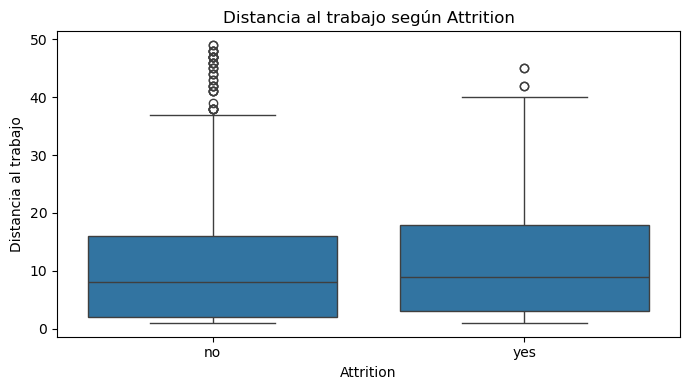

In [185]:
# Analizamos visualmente las variables 'attrition' y la distancia al trabajo
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='attrition', y='distancefromhome')
plt.title("Distancia al trabajo según Attrition")
plt.xlabel("Attrition")
plt.ylabel("Distancia al trabajo")
plt.tight_layout()
plt.show()

 ##### La distancia al trabajo no parece ser un factor determinante en la decisión de renunciar, ya que tanto los que se quedaron como los que se fueron recorren distancias similares. 


C:\Users\carol\AppData\Local\Temp\ipykernel_31568\1182135408.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df_filtrado, x='overtime', y='distancefromhome', hue='attrition', palette=["#F5A873", "#4A90E2", "#F28C54"])


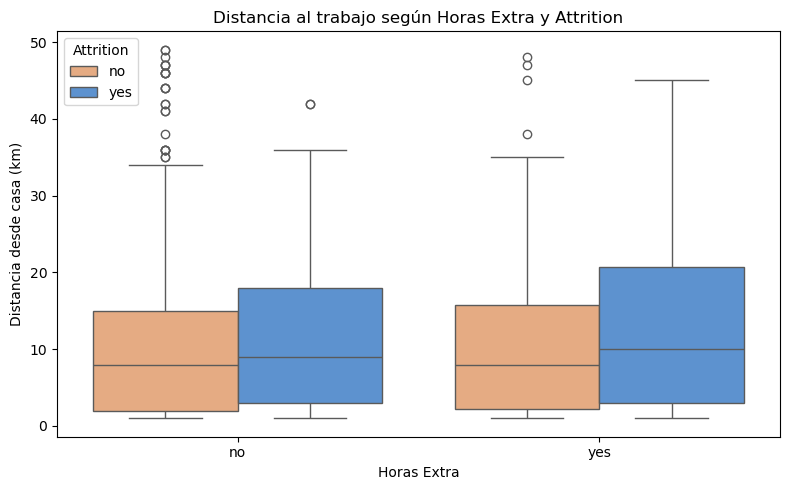

In [186]:
# Filtrar si hay categorías "desconocido" en OverTime
df_filtrado = df[df['overtime'] != 'desconocido']

# Gráfico de cajas
plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtrado, x='overtime', y='distancefromhome', hue='attrition', palette=["#F5A873", "#4A90E2", "#F28C54"])

# Etiquetas y título
plt.title("Distancia al trabajo según Horas Extra y Attrition")
plt.xlabel("Horas Extra")
plt.ylabel("Distancia desde casa (km)")
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()

##### Por sí sola, la distancia al trabajo no parece determinar la rotación, como vimos en el gráfico anterior. Sin embargo, cuando se combina con las horas extra, emerge un patrón claro: los empleados que hacen horas extra y además viven más lejos son más propensos a dejar la empresa. 


In [187]:
# Crear una copia del DataFrame para no modificar el original
df_analisis = df[df['overtime'] != 'desconocido'].copy()

# Clasificar los niveles de satisfacción en tres grupos
def clasificar_satisfaccion(nivel):
    if nivel <= 2:
        return 'Baja'
    elif nivel == 3:
        return 'Media'
    else:
        return 'Alta'

df_analisis['nivel_satisfaccion'] = df_analisis['jobsatisfaction'].apply(clasificar_satisfaccion)

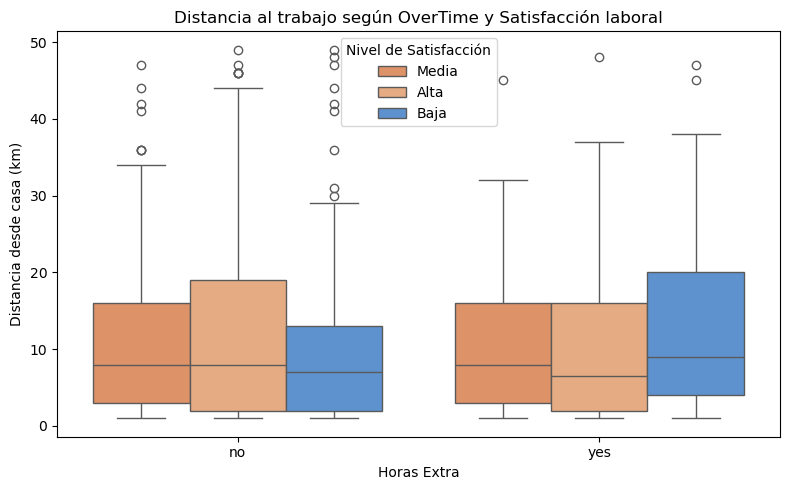

In [188]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_analisis, x='overtime', y='distancefromhome', hue='nivel_satisfaccion',
            palette=["#F28C54", "#F5A873", "#4A90E2"]) 

plt.title("Distancia al trabajo según OverTime y Satisfacción laboral")
plt.xlabel("Horas Extra")
plt.ylabel("Distancia desde casa (km)")
plt.legend(title="Nivel de Satisfacción")
plt.tight_layout()
plt.show()

##### Cuando un empleado tiene baja satisfacción, trabaja horas extra y vive lejos, estos factores se vuelve más riesgosos.


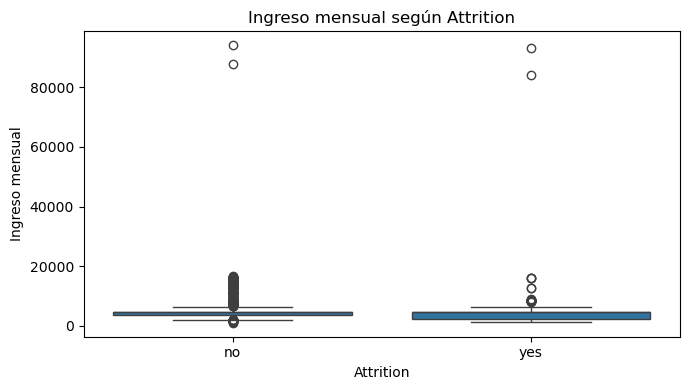

In [189]:
# Analizamos visualmente el ingreso mensual y la varaible 'attrition':
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='attrition', y='monthlyincome')
plt.title("Ingreso mensual según Attrition")
plt.xlabel("Attrition")
plt.ylabel("Ingreso mensual")
plt.tight_layout()
plt.show()

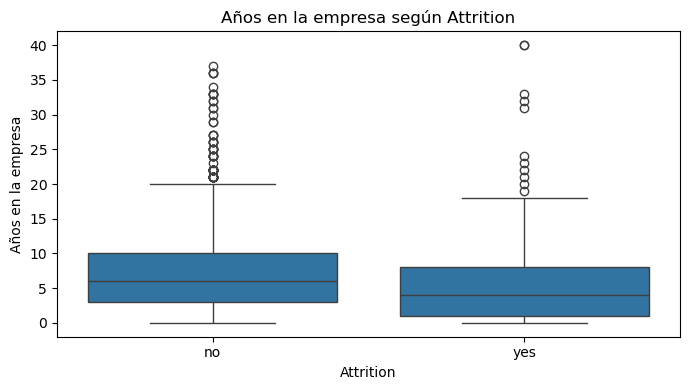

In [190]:
# Analizamos visualmente los años en la empresa y la varaible 'attrition':
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='attrition', y='yearsatcompany')
plt.title("Años en la empresa según Attrition")
plt.xlabel("Attrition")
plt.ylabel("Años en la empresa")
plt.tight_layout()
plt.show()


##### Conclusión: los empleados que deciden abandonar la empresa suelen tener una menor antigüedad laboral en ella.

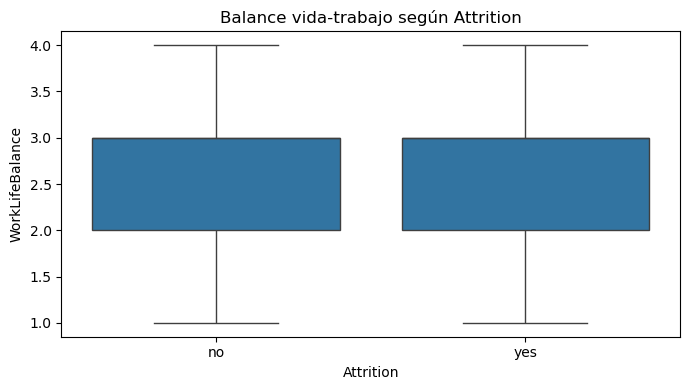

In [191]:
# Balance vida-trabajo según la varaible 'attrition'
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='attrition', y='worklifebalance')
plt.title("Balance vida-trabajo según Attrition")
plt.xlabel("Attrition")
plt.ylabel("WorkLifeBalance")
plt.tight_layout()
plt.show()

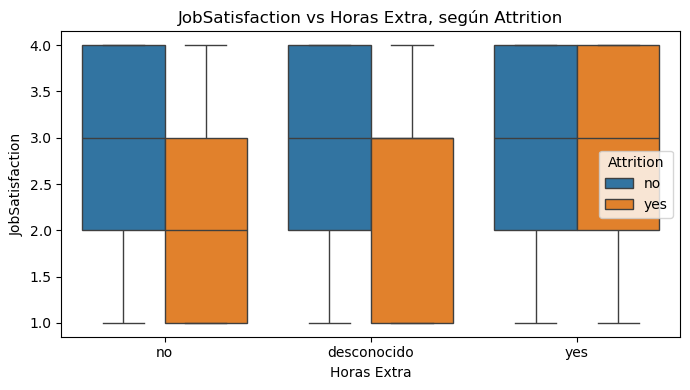

In [192]:
# JobSatisfaction vs Horas Extra, según Attrition
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='overtime', y='jobsatisfaction', hue='attrition')
plt.title("JobSatisfaction vs Horas Extra, según Attrition")
plt.xlabel("Horas Extra")
plt.ylabel("JobSatisfaction")
plt.legend(title="Attrition")
# Invertir el eje y
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### Conclusión: los empleados que hacen horas extra y tienen baja satisfacción laboral son los más propensos a marcharse.


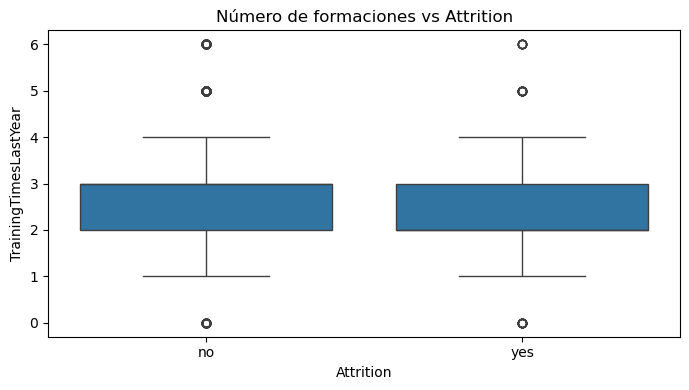

In [193]:
# TrainingTimesLastYear vs Attrition
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='attrition', y='trainingtimeslastyear')
plt.title("Número de formaciones vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("TrainingTimesLastYear")
plt.tight_layout()
plt.show() 

##### Conclusión: la ausencia de formación no es el motivo de las bajas laborales.

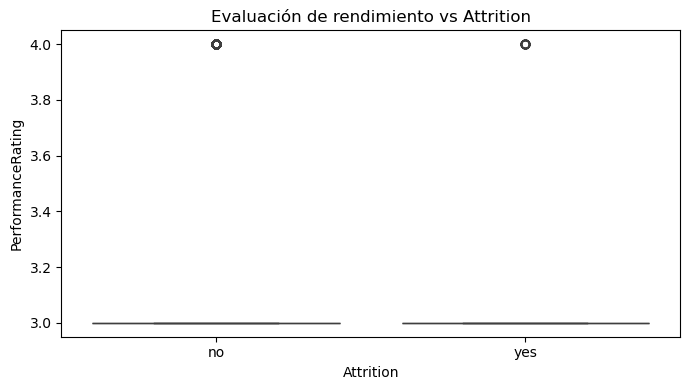

In [194]:
# PerformanceRating vs Attrition
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='attrition', y='performancerating')
plt.title("Evaluación de rendimiento vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("PerformanceRating")
plt.tight_layout()
plt.show()

##### Conclusión: la evaluación de desempeño por valoración es media pero llama la atención la homogeneidad de valores. Necesitamos más información para valorar esta variable.

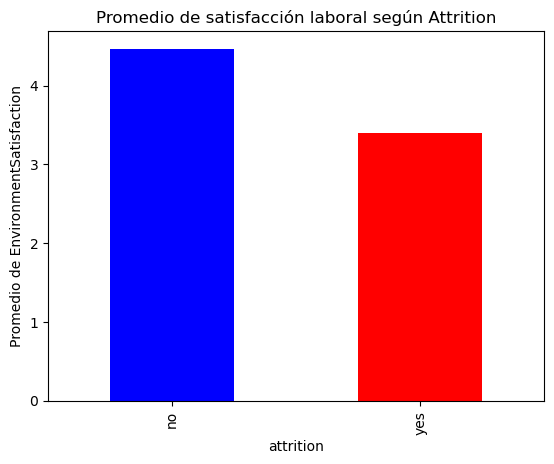

In [195]:
# Promedio de satisfacción laboral según Attrition
df_grouped = df.groupby("attrition")["environmentsatisfaction"].mean()
df_grouped.plot(kind="bar", color=["blue", "red"])
plt.title("Promedio de satisfacción laboral según Attrition")
plt.ylabel("Promedio de EnvironmentSatisfaction")
plt.show()

##### Conclusión: se aprecia la diferencia de satisfacción laboral entre los que permanecen en la empresa y los que no.

## Fase 4: Diseño de BBDD e Insercción de los Datos (estructura)

In [196]:
#- Conectamos a MySQL utilizando los parámetros que proponemos.
#- Creamos la base de datos 'abc_corporation' si no existe.
#- Creamos las tablas con las estructuras definidas.
#- Cargamos los datos desde el CSV con datos limpios a las tablas de MySQL.


In [197]:
# Parámetros de conexión
usuario = 'root'
contrasena = 'AlumnaAdalab'
host = 'localhost'
nombre_bd = 'abc_corporation'

# Conectar a MySQL
conexion = mysql.connector.connect(
    user=usuario,
    password=contrasena,
    host=host
)
cursor = conexion.cursor()

# Crear base de datos si no existe
cursor.execute(f"CREATE DATABASE IF NOT EXISTS {nombre_bd}")
cursor.execute(f"USE {nombre_bd}")

# Crear tablas
tablas = {
    "Employee": """
        CREATE TABLE IF NOT EXISTS Employee (
            employeenumber INT PRIMARY KEY,
            age INT,
            gender VARCHAR(50),
            maritalstatus VARCHAR(50),
            education VARCHAR(50),
            joblevel INT,
            jobrole VARCHAR(50),
            yearsatcompany INT,
            yearssincelastpromotion INT,
            yearswithcurrmanager INT,
            totalworkingyears INT,
            attrition VARCHAR(50),
            businesstravel VARCHAR(50),
            distancefromhome INT,
            standardhours VARCHAR (20),
            remotework VARCHAR (10)
        )
    """,
    "Salary": """
        CREATE TABLE IF NOT EXISTS Salary (
            employeenumber INT PRIMARY KEY,
            salary DECIMAL(10,2),
            monthlyincome DECIMAL(10,2),
            monthlyrate DECIMAL(10,2),
            dailyrate DECIMAL(10,2),
            stockoptionlevel INT,
            percentsalaryhike DECIMAL(5,2),
            FOREIGN KEY (employeenumber) REFERENCES Employee(employeenumber)
        )
    """,
    "Performance": """
        CREATE TABLE IF NOT EXISTS Performance (
            employeenumber INT PRIMARY KEY,
            performancerating INT,
            jobinvolvement INT,
            jobsatisfaction INT,
            worklifebalance INT,
            environmentsatisfaction INT,
            relationshipsatisfaction INT,
            FOREIGN KEY (employeenumber) REFERENCES Employee(employeenumber)
        )
    """,
    "Training": """
        CREATE TABLE IF NOT EXISTS Training (
            employeenumber INT PRIMARY KEY,
            trainingtimeslastyear INT,
            FOREIGN KEY (employeenumber) REFERENCES Employee(employeenumber)
        )
    """,
    "Overtime": """
        CREATE TABLE IF NOT EXISTS Overtime (
            employeenumber INT PRIMARY KEY,
            overtime VARCHAR (50),
            FOREIGN KEY (employeenumber) REFERENCES Employee(employeenumber)
        )
    """
}

# Ejecutar la creación de tablas
for nombre_tabla, sql in tablas.items():
    cursor.execute(sql)

# Cargar datos desde el archivo CSV
df = pd.read_csv("abc_corporation_hr_clean.csv")
df = df.replace({pd.NA: None, 'nan': None, float('nan'): None})




# Insertar datos en cada tabla
for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO Employee VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row[['employeenumber', 'age', 'gender', 'maritalstatus', 'education', 'joblevel',
                    'jobrole', 'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
                    'totalworkingyears', 'attrition', 'businesstravel', 'distancefromhome',
                    'standardhours', 'remotework']]))
    
    cursor.execute("""
        INSERT INTO Salary VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, tuple(row[['employeenumber', 'salary', 'monthlyincome', 'monthlyrate',
                    'dailyrate', 'stockoptionlevel', 'percentsalaryhike']]))

    cursor.execute("""
        INSERT INTO Performance VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, tuple(row[['employeenumber', 'performancerating', 'jobinvolvement',
                    'jobsatisfaction', 'worklifebalance', 'environmentsatisfaction',
                    'relationshipsatisfaction']]))

    cursor.execute("""
        INSERT INTO Training VALUES (%s, %s)
    """, tuple(row[['employeenumber', 'trainingtimeslastyear']]))

    cursor.execute("""
        INSERT INTO Overtime VALUES (%s, %s)
    """, tuple(row[['employeenumber', 'overtime']]))

# Confirmar cambios y cerrar conexión
conexion.commit()
cursor.close()
conexion.close()